[Oregon Curriculum Network](http://4dsolutions.net/ocn/)

[Home](School_of_Tomorrow.ipynb)

# RADIOTOXINS

One of the big tasks facing humanity in the 21st Century is protecting itself from past screw-ups.  

Humans destroyed two of their major cities, and spread radiotoxins around the planet as soon as they discovered how to make nuclear bombs (so-called "atom bombs"). 

Welcome to Planet of the Apes.  "We are DEVO".

In [1]:
%%HTML
<iframe src="https://giphy.com/embed/bSdkuLDnrYheE" width="480" height="196" 
frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p>
<a href="https://giphy.com/gifs/planet-of-the-apes-bSdkuLDnrYheE">via GIPHY</a>
</p>

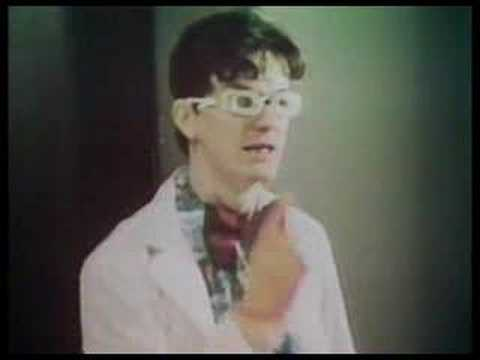

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("hRguZr0xCOc") # https://youtu.be/hRguZr0xCOc

In [3]:
from pandas import Series, DataFrame

# in years
half_life_table = {
'Pu238': 87.74,
'Pu239': 24_100,
'Pu240': 6500,
'Pu241': 14,
'I131' : 8.02/365.2181,   # days per year
'Cs137': 30.17,           # major byproduct of Fukushima meltdowns
'Cs134': 2.06,
'Xe133': 5.2475/365.2181, # fraction of a year
'Co60' : 5.27
}

column = Series([float(v) for v in half_life_table.values()], index=half_life_table.keys())
table = DataFrame({'Years':column}, index=column.index)
table.index.name = "Isotope"
table.sort_values(by='Years', inplace=True, ascending=False)
ax = table.plot.bar(logy=True, legend=False, title="Half Lives")
ax.set_ylabel("Years (log scale)");

The fact that the atomic nucleii of unstable isotopes kick out particles (shoot bullets) in order to become more stable, is only the beginning of the story.  

Exactly what particles do they kick out?  Neutrons?  Alpha particles?  Electrons?  

The type of particles emitted makes a difference when it comes to the effects on biologicals (see below). Just counting their number, like a Geiger counter does, only tells part of the story.

Although an isolated proton in a hydrogen atom is not known to spontaneously decay, protons within atomic nucleii will turn into neutrons, and vice versa.  

When a proton turns into a neutron, it ejects a positron and a neutrino ($\beta$+ decay).  When a neutron turns into a proton, it kicks out an electron and an anti-neutrino ($\beta$- decay).  See [Fig. 620.06](http://www.rwgrayprojects.com/synergetics/s06/figs/f2006.html) in Synergetics.

A proton may capture an electron from the surroundings and turn into a neutron, emiting a neutrino.

![Pu Decay](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Sasahara.svg/800px-Sasahara.svg.png)

Permission details:

CC-BY-SA-3.0-MIGRATED; Licensed under the GFDL by the author; Released under the GNU Free Documentation License.

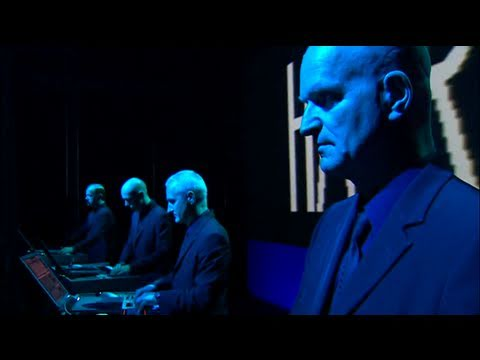

In [4]:
YouTubeVideo("0EBTn_3DBYo") # https://youtu.be/0EBTn_3DBYo

### Historical Sidebar

New Zealand based [geochemist Bernie Gunn](https://worldgame.blogspot.com/2004/12/view-from-middle-earth.html) used to complain to me (Kirby Urner) that the new generations of geochemist seemed mostly eager to attend conferences at resort destinations and enjoy drinks by the pool.  When would they find the time to get any work done?

### Programming Interlude:  Ploting Radioactive Decay

[OpenStax Chemistry](https://opentextbc.ca/chemistry/)

[Radioactive Decay](https://opentextbc.ca/chemistry/chapter/21-3-radioactive-decay/)

![Rutherford's Apparatus](https://opentextbc.ca/chemistry/wp-content/uploads/sites/150/2016/05/CNX_Chem_21_03_Radiation.jpg)

$$_LaTex$$

$\alpha$ Decay: 

$$_{84}^{210}\text{Po}\;{\longrightarrow}\;_2^4\text{He}\;+\;_{82}^{206}\text{Pb}\;\;\;\;\text{or}\;\;\;\;_{84}^{210}\text{Po}\;{\longrightarrow}\;_2^4{\alpha}\;+\;_{82}^{206}\text{Pb}$$

$\beta$+ Decay:

$$_{19}^{40}\text{K}\;+\;_{-1}^0\text{e}\;{\longrightarrow}\;_{18}^{40}\text{Ar}$$

![Cobalt Decay](https://opentextbc.ca/chemistry/wp-content/uploads/sites/150/2016/05/CNX_Chem_21_03_HalfLife.jpg)

For more background on plotting using ```matplotlib``` see [Arithmetic, Plotting](arithmetic_of_tomorrow.ipynb).

In [5]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

$$
{\lambda} = \frac{\text{ln}\;2}{t_{1/2}} = \frac{0.693}{t_{1/2}}\;\;\;\;\text{or}\;\;\;\;t_{1/2} = \frac{\text{ln}\;2}{\lambda} = \frac{0.693}{\lambda}
$$

$$
N_t = N_0e^{-kt}\;\;\;\;\text{or}\;\;\;\;t = -\frac{1}{\lambda}\text{ln}(\frac{N_t}{N_0})
$$

In [6]:
half_life_colbalt = 5.27 # years
rate_constant = math.log(2)/half_life_colbalt
rate_constant

0.13152697923338622

In [7]:
time_axis  = np.arange(0, 6 * half_life_colbalt, half_life_colbalt/12) # 100 data points
snap_shots = np.linspace(0, 6 * half_life_colbalt, 6)

In [8]:
remaining_cobolt_cont = 100 * math.e ** (-rate_constant * time_axis)
remaining_cobolt_disc = 100 * math.e ** (-rate_constant * snap_shots)

In [9]:
year15 = 100 * math.e ** (-rate_constant * 15)
year15

13.905236523299653

In [10]:
# high frequency sample (more continuous)
data1 = pd.DataFrame({"Time": pd.Series(time_axis),
                      "Mass": pd.Series(remaining_cobolt_cont)})

# low frequency sample (more discrete)
data2 = pd.DataFrame({"Time": pd.Series(snap_shots),
                     "Mass": pd.Series(remaining_cobolt_disc)})

In [11]:
data1.head()

,Time,Mass
0,0.000000,100.000000
1,0.439167,94.387431
2,0.878333,89.089872
3,1.317500,84.089642
4,1.756667,79.370053


In [12]:
data2.head(6)

,Time,Mass
0,0.000,100.000000
1,6.324,43.527528
2,12.648,18.946457
3,18.972,8.246924
4,25.296,3.589682
5,31.620,1.562500


Tips:

The [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method does a lot. You may set the kind of plot, and in extracting the axes, you've got access to an Artist.

[What about colors?](https://matplotlib.org/api/colors_api.html)

Getting multiple plots in the same figure requires passing the axes into subsequent plots.  [StackOverFlow has the answers](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure) a lot of times.

Text(0, 0.5, 'Cobalt Remaining')

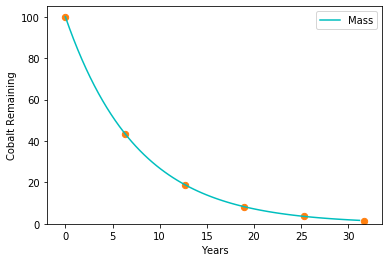

In [13]:
ax = data1.plot(x="Time", y="Mass", kind="line", color = ['c'])
ax.set_ylim(0,105)

# note passing ax
ax = data2.plot.scatter(x="Time" ,y="Mass", ax = ax, 
           color = 'tab:orange', s=40)

ax.set_xlabel("Years")
ax.set_ylabel("Cobalt Remaining")

<blockquote>
Plutonium is still omnipresent in the environment from previous atmospheric nuclear weapons tests. We investigated soil and plants sampled at different hot spots in Japan, searching for reactor-borne plutonium using its isotopic ratio 240Pu/239Pu. By using accelerator mass spectrometry, we clearly demonstrated the release of Pu from the Fukushima Daiichi power plant: While most samples contained only the radionuclide signature of fallout plutonium, there is at least one vegetation sample whose isotope ratio (0.381 +/- 0.046) evidences that the Pu originates from a nuclear reactor (239+240Pu activity concentration 0.49 Bq/kg). Plutonium content and isotope ratios differ considerably even for very close sampling locations, e.g. the soil and the plants growing on it. This strong localization indicates a particulate Pu release, which is of high radiological risk if incorporated.
</blockquote>

[Source: CDC](https://www.cdc.gov/niosh/nioshtic-2/20044680.html)

![OpenStax Logo](https://opentextbc.ca/chemistry/wp-content/uploads/sites/150/2016/05/OSC_Interactive_200-43.png)

License

![Icon for the Creative Commons Attribution 4.0 International License](https://opentextbc.ca/chemistry/wp-content/themes/pressbooks-book/packages/buckram/assets/images/cc-by.svg)

21.3 Radioactive Decay by Rice University is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.

Useful Units:

* [Joule](https://www.britannica.com/science/joule) "In electrical terms, the joule equals one watt-second— i.e., the energy released in one second by a current of one ampere through a resistance of one ohm."
* [Becquerel (Bq)](http://www.radioactivity.eu.com/site/pages/Activity_Doses.htm) = one radioactive decay event per second.
* [The Gray (Gy)](https://youtu.be/bQJQ93yCzR8) = one joule per kilo of radioactivity
* The Rad: 1/100th of a gray (same as rem)
* Banana Equivalent Dose (BED)
* [The sievert](https://youtu.be/vRYwUPBZ-J4) replaces a former unit, the rem : 1 Sv = 100 rem.  The Sv and rem take into account the toxicity of the radiation through use of weighting factors. Is it made up of neutrons, alpha particles, gamma rays, or what?  What organs were exposed?

The energy units such as sievert are not power units (Energy per Time).  Regulatory standards are often expressed in terms of milli-sieverts per year.  1 mSv / yr per person is considered safe but then actual annual exposure is usually higher.  Nuclear plant workers get about 50 mSv / yr, 

Equivalent Dose (H) = Grays * WR (WR = type of radiation)

For x-rays and gamma rays, 10 milligray (mGy) = 10 mSv
For neutrons, 10 milligray (mGy) = 50-200 mSv
For alpha radiation (helium-4 nuclei), 10 milligray (mGy) = 200 mSv

In [14]:
WR = pd.Series([1,1,20], index=['Gamma',"Beta", 'Alpha'])
WR

Gamma     1
Beta      1
Alpha    20
dtype: int64

Effective Dose (E) = Grays * WR * WT (WT = tissue weighting factor)

In [15]:
body_parts = [
"Bladder",
"Bone marrow (red)",
"Bone surface",
"Brain",
"Breast",
"Colon",
"Esophagus",
"Gonads",
"Liver",
"Lung",
"Salivary glands",
"Skin",
"Stomach",
"Thyroid",
"Remainder"]

ICRP103 = [0.04, 0.12, 0.01, 0.01, 0.12, 0.12, 0.04, 0.08, 0.04, 0.12, 0.01, 0.01, 0.12, 0.04, 0.12]

WT = pd.Series(ICRP103, index=body_parts)
WT

Bladder              0.04
Bone marrow (red)    0.12
Bone surface         0.01
Brain                0.01
Breast               0.12
Colon                0.12
Esophagus            0.04
Gonads               0.08
Liver                0.04
Lung                 0.12
Salivary glands      0.01
Skin                 0.01
Stomach              0.12
Thyroid              0.04
Remainder            0.12
dtype: float64

Canned [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html) may be sampled and cycled through. 

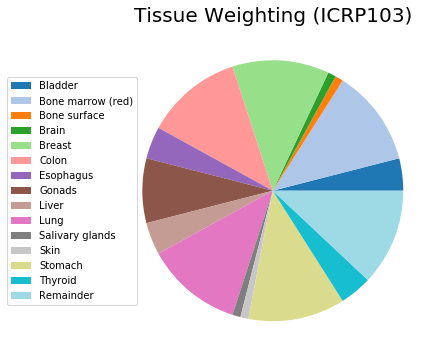

In [16]:
cs = plt.cm.tab20(np.linspace(0, 1, 15))  # snip a canned strip into colored pieces
ax = WT.plot.pie(figsize=(6,6), labels=None, colors=cs)
ax.set_ylabel('')
ax.set_title("Tissue Weighting (ICRP103)", fontsize=20)
plt.legend(bbox_to_anchor=(.1,.5), labels=WT.index, loc="right");

"[O]ne sievert is generally defined as the amount of radiation roughly equivalent in biological effectiveness to one gray (or 100 rads) of gamma radiation." [Britannica](https://www.britannica.com/technology/sievert)

1 mSv is the dose produced by exposure to 1 milligray (mGy) of radiation.

![DNA](https://upload.wikimedia.org/wikipedia/commons/1/16/DNA_orbit_animated.gif)

Clearly the sievert and rem depend on a lot of ancillary science regarding the adverse health effects of different types of radiation and from what distance.  There's room to cook the books, such as by excluding certain radio frequencies from the ionizing category. 

Electromagnetic radiation is a source of sieverts in the case of gamma rays and microwaves.  If you stand close to the wrong frequencies of electromagnetic radiation (high frequency photons), you could get burned.  

So what about 5G, the new cell phone frequencies, held close to the head or transmitted from a nearby light pole?  "More study is needed" say some. "No significant increased risk" say others. Be on the lookout for junk science wherever politics are involved.

![radioactivity](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Radiation_warning_symbol.svg/200px-Radiation_warning_symbol.svg.png)

<img src="https://cdn.pixabay.com/photo/2012/04/01/18/58/warning-24047_960_720.png" width="200" />

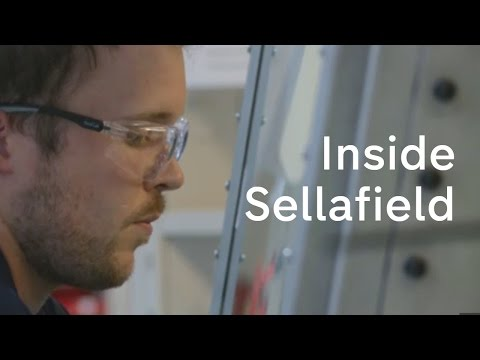

In [17]:
YouTubeVideo("iUE2846zgCA")  # https://youtu.be/iUE2846zgCA

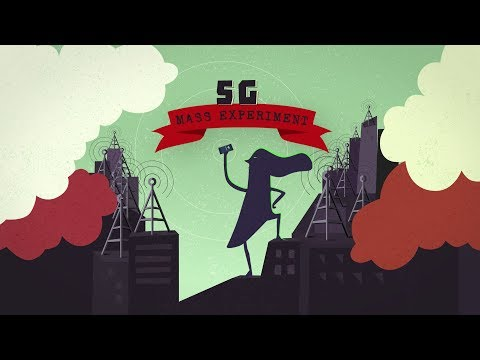

In [18]:
YouTubeVideo("JKaoLxw0qJI") # https://youtu.be/JKaoLxw0qJI

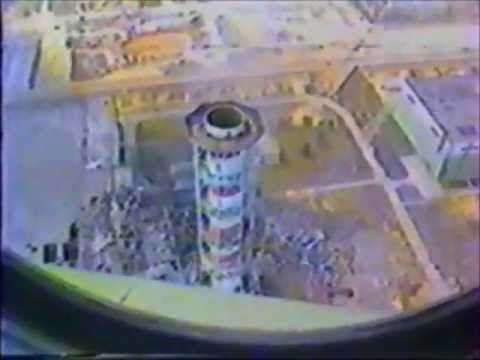

In [19]:
YouTubeVideo("Cc-vvhWXL9Q") # https://youtu.be/Cc-vvhWXL9Q

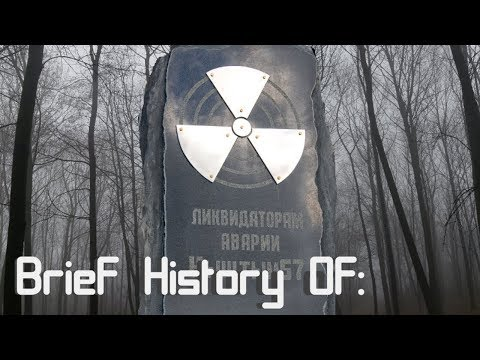

In [20]:
YouTubeVideo("dur-q-r0pW4")   # https://youtu.be/dur-q-r0pW4

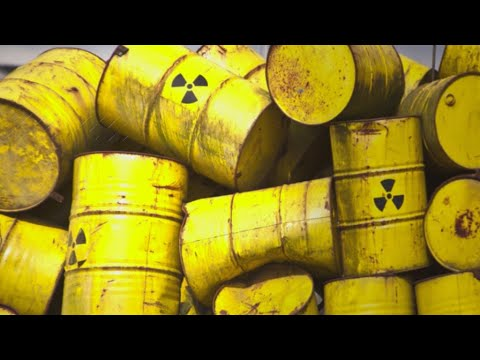

In [21]:
YouTubeVideo("NzqJtHZXsiM") # https://youtu.be/NzqJtHZXsiM

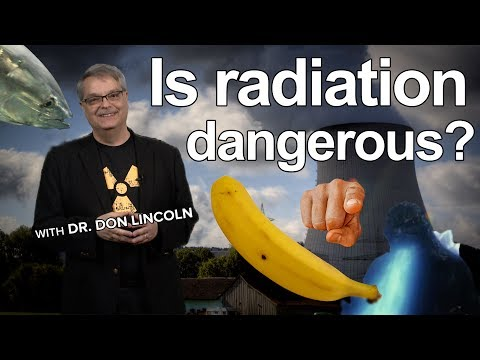

In [22]:
YouTubeVideo("J-hfoDy904E") # https://youtu.be/J-hfoDy904E

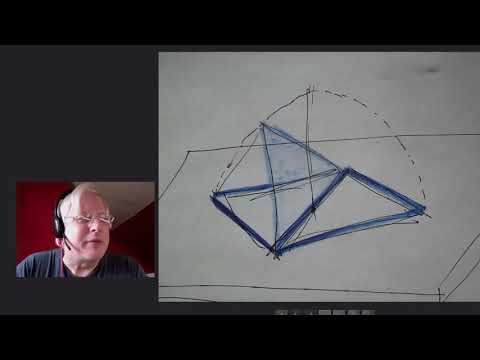

In [23]:
YouTubeVideo("GXefbSeo9HM") # https://youtu.be/GXefbSeo9HM

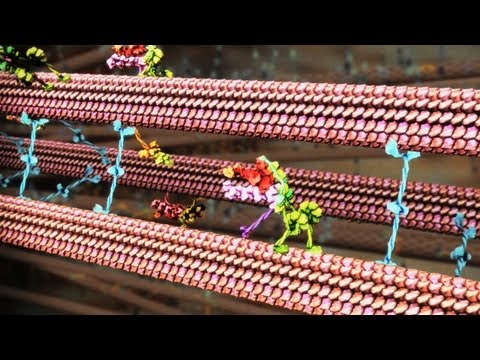

In [24]:
YouTubeVideo("WFCvkkDSfIU")  # https://youtu.be/WFCvkkDSfIU

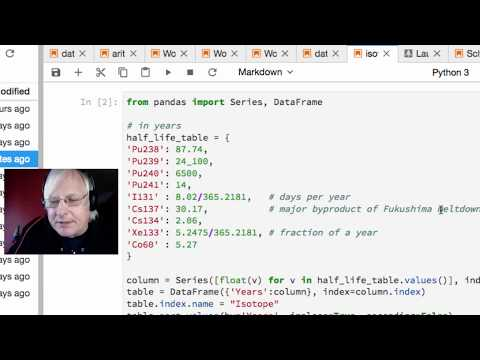

In [25]:
YouTubeVideo("A83aetwlOSc")    # https://youtu.be/A83aetwlOSc